# Modules in Python

Reference: <br>
University of College London Python lecture note <br>
MIT Python lecture note <br>
Scipy lecture notes (http://scipy-lectures.org/index.html)

When you import a full module, you can access its functions or constant using the "dot notation":

In [2]:
import math
print(math.sqrt(2))
print(math.pi)

1.4142135623730951
3.141592653589793


It goes hierarchically in the module. Some modules have multiple levels, e.g.: 

In [4]:
import numpy
numpy.random.rand()   # Random number generation

0.6624402112897089

## Some modules that we will be using in this class

### numpy
- A powerful n-dimensional array object
- Useful linear algebra, Fourier transfor, and random number capavilities
- http://www.numpy.org/

### matplotlib
- Flexible 2D plotting library
- Produces publication quality figures
- http://matplotlib.org/

# Creating numpy arrays 

1. a Python list
2. using functions that are dedicated to generating numpy arrays, such as arange, linspace etc.
3. Reading data from files

### From lists

In [3]:
import numpy as np
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [9]:
M = np.array([[1,2],[3,4]])
M

array([[1, 2],
       [3, 4]])

In [10]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

In [11]:
v.shape, M.shape

((4,), (2, 2))

In [12]:
v.size, M.size

(4, 4)

In [13]:
np.shape(M), np.size(M)

((2, 2), 4)

### Using array-generating functions
For larger arrays it is more practical to use numpy functions that generate arrays of different forms.

#### arange

In [8]:
# create a range
a = np.arange(0,10,1)  # arguments: start, stop, step
print(a)

[0 1 2 3 4 5 6 7 8 9]


### Exercise: 
Create an array (x) from 0 to 100 with an increment of 5 and print.

#### Zeros and ones

In [16]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Exercise: 
Create a 4x2 matrix (4 columns and 2rows) consist of zeros.

# Making plots

### Using the matplotlib module

In [3]:
import matplotlib.pyplot as plt

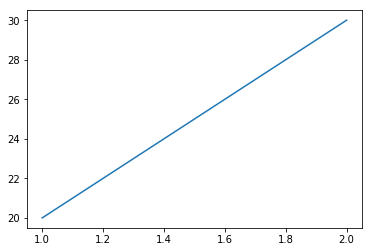

In [4]:
plt.plot([1,2],[20,30])

### Jupyter notebook: 
For interactive matplotlib sessions, turn on the matplotlib mode. 	
In the notebook, insert, at the beginning of the notebook the following magic:

In [16]:
%matplotlib inline

#### Exercise
Create an array y = x$^2$ + 2x and print.

#### Exercise
Create a plot using x and y.

## Advanced (Optional)

In [36]:
import xarray as xr
#file='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc'
file="absolute_v5.nc" # 1961-1990 mean 
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 12)
Coordinates:
  * time     (time) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Data variables:
    tem      (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version ?? (http://mpim...
    Conventions:               CF-1.6
    history:                   Wed May 20 16:30:15 2020: ncap2 -O -s time=tim...
    CDO:                       Climate Data Operators version 1.9.3 (http://m...
    NCO:                       4.7.2
    nco_openmp_thread_number:  1
    reference:                 Osborn TJ, Jones PD, Lister DH, Morice CP, Sim...
    licence:                   Open Government Licence http://www.nationalarc...

Calcuate monthly average temperature at each grid.

In [35]:
ta=ds.air
ta_clim = ta.groupby('time.month').mean(dim='time')
ta_clim

<xarray.DataArray 'air' (month: 12, lat: 73, lon: 144)>
array([[[-30.116816, -30.116816, -30.116816, ..., -30.116816,
         -30.116816, -30.116816],
        [-31.104946, -31.063517, -31.02406 , ..., -31.23201 ,
         -31.1885  , -31.146742],
        [-30.987425, -30.700146, -30.41206 , ..., -31.790617,
         -31.539276, -31.269903],
        ...,
        [-19.9364  , -19.78003 , -19.628336, ..., -20.274551,
         -20.202164, -20.08313 ],
        [-20.701902, -20.725365, -20.744568, ..., -20.578588,
         -20.63046 , -20.670614],
        [-22.46728 , -22.46728 , -22.46728 , ..., -22.46728 ,
         -22.46728 , -22.46728 ]],

       [[-30.63283 , -30.63283 , -30.63283 , ..., -30.63283 ,
         -30.63283 , -30.63283 ],
        [-31.456573, -31.400267, -31.344563, ..., -31.630676,
         -31.572218, -31.514307],
        [-31.192875, -30.880375, -30.567854, ..., -32.06053 ,
         -31.789818, -31.49897 ],
...
        [-30.17432 , -30.037996, -29.900534, ..., -30.384655,
         -30.366291, -30.289639],
        [-30.626917, -30.668922, -30.701567, ..., -30.425955,
         -30.507502, -30.574352],
        [-31.28549 , -31.28549 , -31.28549 , ..., -31.28549 ,
         -31.28549 , -31.28549 ]],

       [[-28.689373, -28.689373, -28.689373, ..., -28.689373,
         -28.689373, -28.689373],
        [-29.696526, -29.662495, -29.628231, ..., -29.795961,
         -29.762619, -29.729923],
        [-29.769016, -29.506756, -29.240297, ..., -30.46602 ,
         -30.25394 , -30.019852],
        ...,
        [-19.177973, -19.04765 , -18.9276  , ..., -19.462276,
         -19.401194, -19.301098],
        [-20.308363, -20.345507, -20.378752, ..., -20.149796,
         -20.211988, -20.264002],
        [-22.151125, -22.151125, -22.151125, ..., -22.151125,
         -22.151125, -22.151125]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Plot January average temperature.

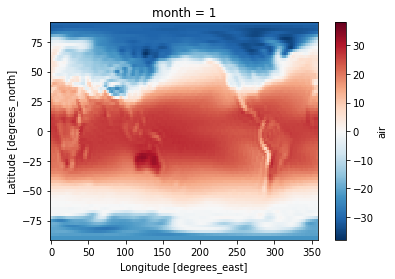

In [10]:
ta_clim.isel(month=0).plot()

### Optional exercise
Plot July average temperature.

Plot the difference between January and July temperature.